In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
initial_heights = np.array([
0.804, 0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
])

final_heights = np.array([
1.9566144, 2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
])

separation_distances = np.array([
19, 14, 6, 29, 53, 18, 36, 39, 27, 25, 5
]) / 1000

height_ratios = final_heights / initial_heights

In [3]:
g = 9.81

approach_velocities = np.sqrt(2 * g * initial_heights)

separation_velocities = np.sqrt(2 * g * final_heights)

velocity_ratios = separation_velocities / approach_velocities

In [4]:
x = separation_distances
y_vel = velocity_ratios
y_height = height_ratios

y = 1.68x + 1.573
y = 5.462x + 2.472


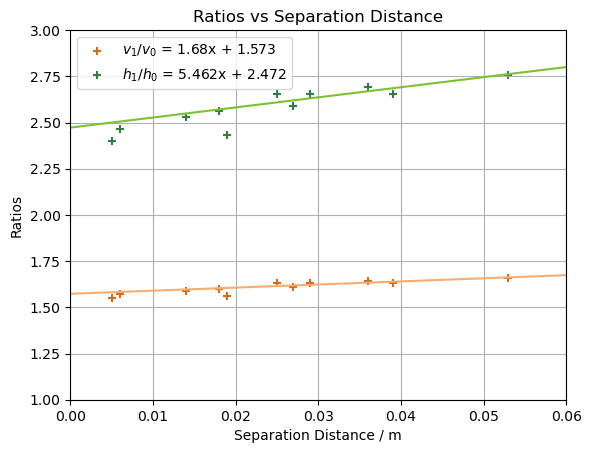

In [ ]:
xlims = (0, 0.06)
ylims = (1.0, 3.0)

vel_colours = ('#d96a13', '#f7ac73')
height_colours = ('#317d44', '#7bc133')

def plot_graph(x_list, y_list, colour_vector, input_label):
    scatter_colour, trend_colour = colour_vector[0], colour_vector[1]

    # Filter out anomalous point at separation = 0.019 m
    x_filtered = x[(x != 0.005) & (x != 0.006) & (x != 0.019)]
    y_filtered = y_list[(x != 0.005) & (x != 0.006) & (x != 0.019)]

    coefficients = np.polyfit(x_filtered, y_filtered, 1)
    slope, intercept = coefficients
    print(f'y = {round(slope, 3)}x + {round(intercept, 3)}')

    # Generate trendline values
    trendline_x = np.linspace(xlims, 100)
    trendline_y = slope * trendline_x + intercept

    plt.scatter(x_list, y_list, marker = '+', color = scatter_colour, label = f'{input_label} = {round(slope, 3)}x + {round(intercept, 3)}')
    plt.plot(trendline_x, trendline_y, color = trend_colour)

plot_graph(x, y_vel, vel_colours, '$v_1 / v_0$')
plot_graph(x, y_height, height_colours, '$h_1 / h_0$')

plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)
plt.title('Ratios vs Separation Distance')
plt.xlabel('Separation Distance / m')
plt.ylabel('Ratios')
plt.grid(True)
plt.show()